In [ ]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 05b Day 2
Rik Blok, with thanks to Giulia Toti

---

# Reminders
- Wed: Module 4 (Compound): Tutorial Resubmission (optional)
- Wed-Fri: Office hours in tutorials (no attendance taken)
- Thu: Office hours in lieu of class
- Fri: Midterm exam

<div class="alert alert-warning">

### ⚠️  [Midterm exam](https://canvas.ubc.ca/courses/123409/assignments/1615199)
   
**WHEN:** Friday Oct 27th, 2023 @ 6:30PM

**WHERE:** You have been assigned to a location based on your surname (last/family name).
- [IRC 2](https://learningspaces.ubc.ca/classrooms/irc-2): Surnames **A-K**
- [WESB 100](https://learningspaces.ubc.ca/classrooms/wesb-100): Surnames **L-R**
- [ESB 1013](https://learningspaces.ubc.ca/classrooms/esb-1013): Surnames **S-Z**
- Students who have registered to write the exam with the CfA will write at the location/time determined by the CfA.
- Students who have submitted an MT Conflict form: please look out for an email sent by the Course Coordinator regarding your exam location and time.

**COVERAGE:** Modules 1 thru 5 (inclusive).

**ID:** Bring your UBCcard.  Other valid picture ID ok.
    
**NO ELECTRONICS:** Exam will be written on paper by hand.  No phones, computers, or calculators.

**WRITING IMPLEMENT:** Bring a **bold**-writing pen/pencil.  Write prominently as your exam will be electronically scanned.  You will not receive credit for any answer that cannot be read.

**REFERENCE SHEET:** We will provide first two pages of the exam reference sheet.
    
**SCRATCH WORK:** You are NOT permitted to bring your own scrap paper.  There will be enough room left on the exam for you to do some scratch work.
    
</div>

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Reference rule recap

<div class="alert alert-info">
    
**ℹ️ Reference rule:** When a data design **refers** to other non-primitive data, delegate the operation to a helper function.

</div>

- Must be applied **every** time a data design manipulates other data that is not primitive
- That includes List, Compound, Enumerated, and Optional types
- Anytime a variable is from a non-primitive type, we should invoke its template function

---

# Helper functions

- A *helper function* is a normal function, but instead of solving the main problem, it solves a small part of the problem, helping the main function to solve the problem
- The main function is the function that actually solves the problem and uses the helper function to achieve this
- A good design has several small helper functions that do only a small task
- Every time the reference rule appears, it indicates that a helper function may be needed

<div class="alert alert-warning">
    
### ⚠️ Exception

No matter how easy the task is, must use a helper... **except** if the helper function would just return the **argument itself or a single field**.  In that rare case, can access the argument or field directly, without calling a helper.

</div>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question

Consider the following data definition (just missing the template):

```python
from typing import NamedTuple 
CD = NamedTuple('CD', 
                [('title', str), 
                 ('artist', str), 
                 ('price', MoneyAmount), 
                 ('release_date', Date), 
                 ('tracks', int) # in range[1,...)]) 
# interp. a CD for sale with its title, artist, 
# price, release date, and number of tracks

CD1 = CD('Master Of Puppets', 'Metallica', 
         MoneyAmount(16,75), Date(1986,3,3), 8)
```

Without knowing anything more about the data types, for which fields will we need to apply the reference rule when writing the template?

Select ALL that apply.  [Set question type to "Multiple Answer".]

  A. ```title```  
  B. ```artist```  
  C. ```price```  
  D. ```release_date```  
  E. ```tracks```  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Which fields are primitive and which aren't?  The example may help you identify them.
    
</details>

---

<div style="float:right; width:30%">
    
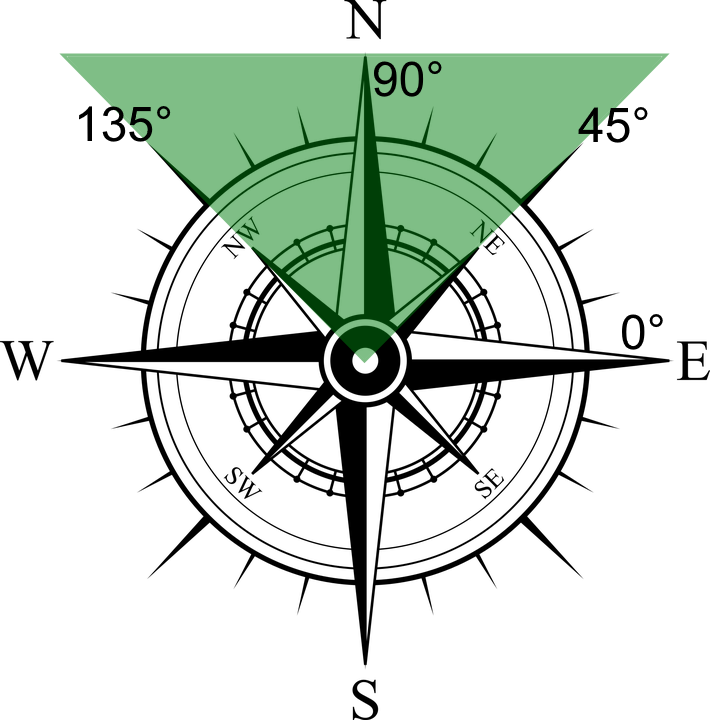

</div>

# Review: Example 1 from last class

**Problem:** Given the compound data `Velocity`, write a function to compute the average speed of all velocities with a *northerly* heading in a list. We will consider directions in the range 45-135 degrees as northerly.

Last time we had completed designing the main function and just needed to finish our `is_northerly` helper function so we could test and debug it.

---

## Data definitions for `Velocity` and `List[Velocity]`

In [ ]:
from typing import NamedTuple 
Velocity = NamedTuple('Velocity', [('speed', float), 
                                   ('dir', int)]) # in range[0,359] 

# interp. a velocity with its speed in m/s and direction 
# as an angle in degrees with east=0 increasing counterclockwise 

V1 = Velocity(9, 22) 
V2 = Velocity(3.4, 180) 

# template based on Compound (2 fields)
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, v.dir) 


from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, 41)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, 265), Velocity(3.5, 89), Velocity(7.9, 323)] 

@typecheck 
# template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 



## Example 1 Helper functions

Your completed helper function should look like this.  Notice the "edge cases" in the examples.

In [ ]:
@typecheck
def is_northerly(v: Velocity) -> bool:
    """
    Returns True if v has a direction in the range [45,135],
    otherwise False.
    """
    # return False # stub
    
    # template from Velocity
    return v.dir >= 45 and v.dir <= 135

start_testing()

expect(is_northerly(V1), False)
expect(is_northerly(V2), False)
expect(is_northerly(Velocity(1.2, 44)), False)
expect(is_northerly(Velocity(3.4, 45)), True)
expect(is_northerly(Velocity(5.6, 135)), True)
expect(is_northerly(Velocity(7.8, 136)), False)

summary()



## Example 1 Main function

In [ ]:
@typecheck
def average_speed_of_northerly(lov: List[Velocity]) -> float:
    """
    Returns the average speed of all velocities in lov
    with a northerly direction.
    
    Northerly means dir is in the range [45,135].
    
    Returns 0.0 if the list doesn't have any northerly-directed
    velocities.
    """
    # return -1 # stub
    
    # template from List[Velocity]
    # sum_northerly is the sum of speeds of northerly velocities
    #   seen in the list so far
    sum_northerly = 0.0 # type: float
    # count_northerly is the count of northerly velocities
    #   seen in the list so far
    count_northerly = 0 # type: int

    for v in lov: 
        # acc = ...(fn_for_velocity(v), acc)
        if is_northerly(v):
            sum_northerly = sum_northerly + v.speed
            count_northerly = count_northerly + 1

    if count_northerly == 0:
        return 0.0
    else:
        return sum_northerly / count_northerly
    

start_testing()

expect(average_speed_of_northerly(LOV0), 0.0)
expect(average_speed_of_northerly(LOV1), 0.0)
expect(average_speed_of_northerly(LOV3), 3.5)
expect(average_speed_of_northerly( [ Velocity(1, 44),
                                     Velocity(2, 45),
                                     Velocity(3, 135),
                                     Velocity(4, 136)    
                                   ]), 2.5)

summary()



---

# Reference rule applied to other data types

Lists can refer to other types defined in a data definition, but so can several other types of data. Specifically, Optionals and Compounds can refer to other data definitions. In those cases, you follow the same reference rule as with lists.

**Every time you are manipulating <span style="background-color:#80FFFF">non-primitive data</span>, the reference rule applies. The template, if written correctly, will help you know when a function is needed.**

In the case of a function for a `List[Velocity]` we applied the reference rule to refer to data of the <span style="background-color:#80FFFF">non-primitive</span> `Velocity` type.  We didn't need to apply the reference rule to the template function for `Velocity` because it just refers to primitive data types.   (We treat the interval `dir` as primitive).

<table>
    <tr><td style="vertical-align:top"><span style="background-color:#80FFFF">List</span></td><td style="vertical-align:top">→</td><td style="vertical-align:top"><span style="background-color:#80FFFF">Velocity</span></td><td style="vertical-align:top">→<br/>⤷</td><td style="vertical-align:top; text-align:left">float (primitive)<br/>int (primitive)</td></tr>
</table>

---

# Exercise 1a: A modified `Velocity`

Let's try working with a modified version of `Velocity` that contains a `Direction` as a cardinal compass direction (enumeration).

Now the compound refers to a <span style="background-color:#80FFFF">non-primitive</span> field:
<table>
    <tr><td style="vertical-align:top"><span style="background-color:#80FFFF">List</span></td><td style="vertical-align:top">→</td><td style="vertical-align:top"><span style="background-color:#80FFFF">Velocity</span></td><td style="vertical-align:top">→<br/>⤷</td><td style="vertical-align:top; text-align:left">float (primitive)<br/><span style="background-color:#80FFFF">Direction</span></td><td style="vertical-align:top"><br/>→</td><td style="vertical-align:top"><br/>distinct value (primitive)</td></tr>
</table>

Let's see how we apply the reference rule for this modified data type.

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡲 1a Data definition for `Direction`
* 🡳 [1a Data definition for `Velocity`](#Fixing-the-data-definition-for-Velocity)
* 🡳 [1a Data definition for List of `Velocity`](#Fixing-the-data-definition-for-List[Velocity])
* 🡳 [1b Helper functions](#Space-reserved-for-additional-helper-functions)
* 🡳 [1b Main function](#Modify-our-main-function)
    
</details>

### The data definition for `Direction` is provided:

In [ ]:
from enum import Enum

Direction = Enum("Direction",["N", "E", "S", "W"])

# interpr. a direction (N - North, E - East, S - South, W - West)

# Examples are redundant for Enumeration

# template based on Enumeration (4 cases)
@typecheck
def fn_for_direction(d: Direction) -> ...:
    if d == Direction.N:
        return ...
    elif d == Direction.E:
        return ...
    elif d == Direction.S:
        return ...
    elif d == Direction.W:
        return ...
    
    

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [1a Data definition for `Direction`](#The-data-definition-for-Direction-is-provided:)
* 🡲 1a Data definition for `Velocity`
* 🡳 [1a Data definition for List of `Velocity`](#Fixing-the-data-definition-for-List[Velocity])
* 🡳 [1b Helper functions](#Space-reserved-for-additional-helper-functions)
* 🡳 [1b Main function](#Modify-our-main-function)
    
</details>

### Fixing the data definition for `Velocity`

In [ ]:
# TODO: Fix the data definition for `Velocity` to use `Direction`

from typing import NamedTuple 
Velocity = NamedTuple('Velocity', 
                      [('speed', float),
                       ('dir', int)]) # in range[0,359] 

# interp. a velocity with its speed in m/s and direction 
# as an angle in degrees with east=0 increasing counterclockwise 

V1 = Velocity(9, 22) 
V2 = Velocity(3.4, 180) 

# template based on Compound (2 fields)
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, v.dir) 



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
As before, we need to apply the reference rule for `v.dir` and add a comment to point it out.  We also need to fix our examples to use the enumeration.
    
```python
from typing import NamedTuple 
Velocity = NamedTuple('Velocity', 
                      [('speed', float), 
                       ('dir', Direction)])  

# interp. a velocity with its speed in m/s and direction 
# as North, East, South, or West

V1 = Velocity(9, Direction.E) 
V2 = Velocity(3.4, Direction.W) 

# template based on Compound and reference rule
@typecheck 
def fn_for_velocity(v: Velocity) -> ...: 
    return ...(v.speed, fn_for_direction(v.dir))
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [1a Data definition for `Direction`](#The-data-definition-for-Direction-is-provided:)
* 🡱 [1a Data definition for `Velocity`](#Fixing-the-data-definition-for-Velocity)
* 🡲 1a Data definition for List of `Velocity`
* 🡳 [1b Helper functions](#Space-reserved-for-additional-helper-functions)
* 🡳 [1b Main function](#Modify-our-main-function)
    
</details>

### Fixing the data definition for `List[Velocity]`

In [ ]:
# TODO: Fix the data definition for `List[Velocity]` to use `Direction`

from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, 41)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, 265), Velocity(3.5, 89), Velocity(7.9, 323)] 

@typecheck 
# Template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 



---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

### iClicker question: Where to apply the reference rule?

Target one of the places we'll need to change in order to apply the reference rule in the code above. [Set question type to "Target".]

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (For later.  Don't peek if you want to learn 🙂)</summary>

Psyche! 😄  No changes to the reference rule are needed because we're already calling a helper function `fn_for_velocity`.  
    
But we will need to update the examples for `Velocity` to use the new enumeration.
    
```python
from typing import List 
# List[Velocity] 
# interp. a list of velocities 

LOV0 = [] 
LOV1 = [Velocity(3.1, Direction.E)] 
LOV2 = [V1, V2] 
LOV3 = [Velocity(5.9, Direction.S), Velocity(3.5, Direction.N), Velocity(7.9, Direction.E)] 

@typecheck 
# Template based on arbitrary-sized and reference rule
def fn_for_lov(lov: List[Velocity]) -> ...: 
    # description of the accumulator 
    acc = ... # type: ... 
    for v in lov: 
        acc = ...(fn_for_velocity(v), acc)
    return ...(acc) 
```
    
</details>

---

# Exercise 1b: A similar problem

**Problem:** Given the modified compound data `Velocity`, write a function to compute the average speed of all velocities in a list with a *user-specified* `Direction` (i.e., a function argument).


<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [1a Data definition for `Direction`](#The-data-definition-for-Direction-is-provided:)
* 🡱 [1a Data definition for `Velocity`](#Fixing-the-data-definition-for-Velocity)
* 🡱 [1a Data definition for List of `Velocity`](#Fixing-the-data-definition-for-List[Velocity])
* 🡲 1b Helper functions
* 🡳 [1b Main function](#Modify-our-main-function)
    
</details>

### Space reserved for additional helper functions

In [ ]:
# TODO: Add any added/changed helper functions here after designing the main function below



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample helper functions (For later.  Don't peek if you want to learn 🙂)</summary>

In `is_velocity_in_dir` below we made a call to a new helper function `is_same_dir` so we need to design that helper function here.
    
```python
@typecheck
def is_same_dir(d1: Direction, d2: Direction) -> bool:
    """
    Returns True if d1 and d2 are the same direction, otherwise False.
    """
    # return True # stub
    # instead of template from Direction
    return d1 == d2

start_testing()

expect(is_same_dir(Direction.N, Direction.N), True)
expect(is_same_dir(Direction.E, Direction.N), False)
expect(is_same_dir(Direction.S, Direction.N), False)
expect(is_same_dir(Direction.W, Direction.N), False)
expect(is_same_dir(Direction.W, Direction.E), False)
expect(is_same_dir(Direction.W, Direction.S), False)
expect(is_same_dir(Direction.W, Direction.W), True)

summary()
```
    
</details>

In [ ]:
# TODO: Add any added/changed helper functions here after designing the main function below



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample helper function (For later.  Don't peek if you want to learn 🙂)</summary>

Note that we've called a new helper function `is_same_dir` so we need to design that function, too.  (We'll put it in a cell above.)
    
```python
@typecheck
def is_velocity_in_dir(v: Velocity, d: Direction) -> bool:
    """
    Returns True if Velocity v is in Direction d, otherwise False.
    """
    # return True # stub
    # template from Velocity with extra parameter `d`
    # return ...(fn_for_direction(v.dir, d))
    return is_same_dir(v.dir, d)

start_testing()

expect(is_velocity_in_dir(V1, Direction.N), False)
expect(is_velocity_in_dir(V1, Direction.E), True)
expect(is_velocity_in_dir(V1, Direction.S), False)
expect(is_velocity_in_dir(V1, Direction.W), False)

summary()
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [1a Data definition for `Direction`](#The-data-definition-for-Direction-is-provided:)
* 🡱 [1a Data definition for `Velocity`](#Fixing-the-data-definition-for-Velocity)
* 🡱 [1a Data definition for List of `Velocity`](#Fixing-the-data-definition-for-List[Velocity])
* 🡱 [1b Helper functions](#Space-reserved-for-additional-helper-functions)
* 🡲 1b Main function
    
</details>

### Modify our main function

**Problem:** Given the modified compound data `Velocity`, write a function to compute the average speed of all velocities in a list with a *specified* `Direction`.

Our original `average_speed_of_northerly` function from Module 05b Day 1 is provided below.  Let's modify it as needed to solve the new problem, using our modified `Velocity`.  Add/edit any helper functions in the cell above.

In [ ]:
# TODO: Modify `average_speed_of_northerly` function as needed

@typecheck
def average_speed_of_northerly(lov: List[Velocity]) -> float:
    """
    Returns average speed of all northerly velocities
    in list lov.
    We define northerly as being between 45 and 135 degrees (inclusive).
    If no northerly velocities in list, then returns 0.
    """
    # return -1 # stub 
    # template from List[Velocity]

    # sum of speeds of northerly velocities so far 
    sum_speeds = 0 # type: float 
    
    # count of speeds of northerly velocities so far
    count_speeds = 0 # type: int
    
    for v in lov: 
        # acc = ...(fn_for_velocity(v), acc)
        if is_northerly(v):
            sum_speeds = sum_speeds + v.speed
            count_speeds = count_speeds + 1
            
    if count_speeds == 0:
        return 0
    
    return sum_speeds / count_speeds 

start_testing()

expect(average_speed_of_northerly(LOV0), 0)
expect(average_speed_of_northerly(LOV1), 0)
expect(average_speed_of_northerly(LOV2), 0)
expect(average_speed_of_northerly(LOV3), 3.5)
# other examples:
# multiple northerly
# edge cases

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
from typing import List

@typecheck
def average_speed_in_dir(lov: List[Velocity], d: Direction) -> float:
    """
    Returns the average speed of the Velocities in `lov` with a direction `d`.
    Returns zero if no velocities in the list are in the direction `d`.
    """
    # return -1 # stub
    # Template from List[Velocity] with extra parameter `d`

    # sum of speeds of velocities with direction `d` in list so far
    sum_speeds = 0 # type: float

    # count of velocities with direction `d` in list so far
    count = 0 # type: int

    # for v in lov: 
    #     acc = ...(fn_for_velocity(v), acc)
    for v in lov:
        if is_velocity_in_dir(v, d):
            sum_speeds = sum_speeds + v.speed
            count = count + 1

    if count == 0:
        return 0

    return sum_speeds / count

start_testing()

expect(average_speed_in_dir(LOV0, Direction.N), 0)
expect(average_speed_in_dir(LOV1, Direction.N), 0)
expect(average_speed_in_dir(LOV2, Direction.N), 9)
expect(average_speed_in_dir(LOV3, Direction.N), 3.5)
expect(average_speed_in_dir([ Velocity(1,Direction.E),
                              Velocity(2,Direction.N),
                              Velocity(3,Direction.N),
                              Velocity(4,Direction.W)
                            ], Direction.N), (2+3)/2)

summary()
```
    
</details>

---

### Summary

#### ✅ Helper after helper
    

Recall how we nested <span style="background-color:#80FFFF">non-primitive</span> data types in our `List`:
<table>
    <tr><td style="vertical-align:top"><span style="background-color:#80FFFF">List</span></td><td style="vertical-align:top">→</td><td style="vertical-align:top"><span style="background-color:#80FFFF">Velocity</span></td><td style="vertical-align:top">→<br/>⤷</td><td style="vertical-align:top; text-align:left">float (primitive)<br/><span style="background-color:#80FFFF">Direction</span></td><td style="vertical-align:top"><br/>→</td><td style="vertical-align:top"><br/>distinct value (primitive)</td></tr>
</table>

The reference rule required us to call a helper function in each respective template function:
<table>
    <tr><td style="vertical-align:top"><code><span style="background-color:#80FFFF">fn_for_lov</span></code></td><td style="vertical-align:top">calls</td><td style="vertical-align:top"><code><span style="background-color:#80FFFF">fn_for_velocity</span></code></td><td style="vertical-align:top">calls</td><td style="vertical-align:top; text-align:left"><code><span style="background-color:#80FFFF">fn_for_direction</span></code></td></tr>
</table>

<div class="alert alert-warning">
    
#### ⚠️ Comparing two enums - no template required
    
Notice that `is_same_dir` compares two enumerations (in this case, `Direction`).  As we saw, in this particular case, the enumeration template function turns out not to be very useful.  
    
**In the special case of designing a function that compares two enumerations, you are permitted to not follow the template if it becomes clear that another approach is simpler and clearer.**

</div>

</details>

---

# Modularity

- Notice that the `average_speed_of_northerly` function body didn't change (just examples did)
- Direction only stored in `Velocity` so only helper functions for `Velocity` affected
- In this case, just `is_northerly(v)`
- Pieces of the program are working independently
- Each data type is handled by specific functions
- Each function is responsible for one small task
- Program is broken down into separate components (data types and functions) or "modules" that can be developed, tested, and maintained separately

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Modular programming

What are some advantages of **modular programming**?  Select ALL that apply.  [Set question type to "Multiple Answer".]

<ol style="list-style-type:upper-alpha">
    <li>It facilitates collaborative development by allowing developers to work on different modules at the same time</li>
    <li>It promotes code reuse and modifiability</li>
    <li>It makes it easier to test and debug code</li>
    <li>It enables developers to write code faster without worrying about code structure</li>
    <li>It allows developers to break down a software system into smaller, more manageable components</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
All but one of these are benefits of modular programming.  But modular programming requires careful planning and design to ensure that modules are properly structured and work together seamlessly.
    
</details>

---

<div class="alert alert-warning">
    
### ⚠️ Exercise 2, if time allows

We will get to the following in class if time allows.  Otherwise, you should complete them after class and compare your solutions to the sample solutions provided.
    
Exercise 2 demonstrates how the reference rule applies for an `Optional[non-primitive]`
* 2a demonstrates HtDD and
* 2b demonstrates HtDF.

</div>


# Exercise 2a: Listed or unlisted store price

**Problem:** Given a data definition to represent an amount of money, `MoneyAmount`, in dollars and cents, design another data definition to represent an item's price in a store, which may be listed or unlisted (for example, if the price is negotiable).

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡲 2a Data definition for `MoneyAmount`
* 🡳 [2a Data definition for `Price`](#Data-definition-for-item's-price-in-a-store)
* 🡳 [2b Helper functions](#Helper-functions-(to-be-filled-in-as-needed))
* 🡳 [2b Main function](#Main-function-(start-here-for-top-down-approach))
    
</details>

### Data definition for `MoneyAmount`

In [ ]:
from typing import NamedTuple

MoneyAmount = NamedTuple('MoneyAmount', [('dollars', int), # in range [0, ...)
                                         ('cents', int)])  # in range [0, 100)
# interp. an amount of money in dollars and cents.
MA0 = MoneyAmount(0, 0)
MA2_50 = MoneyAmount(2, 50)
MA99_99 = MoneyAmount(99, 99)

# template based on compound (2 fields)
@typecheck
def fn_for_money_amount(ma: MoneyAmount) -> ...:
    return ...(ma.dollars,
               ma.cents)



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [2a Data definition for `MoneyAmount`](#Data-definition-for-MoneyAmount)
* 🡲 2a Data definition for `Price`
* 🡳 [2b Helper functions](#Helper-functions-(to-be-filled-in-as-needed))
* 🡳 [2b Main function](#Main-function-(start-here-for-top-down-approach))
    
</details>

### Data definition for item's price in a store

In [ ]:
# TODO: Design Price data definition



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
 
```python
from typing import Optional

Price = Optional[MoneyAmount]

# interp. The price in dollars and cents of an item,
# or None to indicate an unlisted price.

P0 = None
P1 = MA2_50 # all other MoneyAmount examples are
            # also Price examples!

# template based on Optional and reference rule
@typecheck
def fn_for_price(p: Price) -> ...:
    if p == None:
        return ...
    else:
        # notice that Price is Optional, so either
        # None or a MoneyAmount.  In this branch we
        # treat it as a MoneyAmount so we need to
        # apply the reference rule
        return ...(fn_for_money_amount(p))
```

</details>

---

# Exercise 2b: Can I afford it?

**Problem:** Design a function to determine if I might be able to afford an item based on my amount of money and its price.

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [2a Data definition for `MoneyAmount`](#Data-definition-for-MoneyAmount)
* 🡱 [2a Data definition for `Price`](#Data-definition-for-item's-price-in-a-store)
* 🡲 2b Helper functions
* 🡳 [2b Main function](#Main-function-(start-here-for-top-down-approach))
    
</details>

### Helper functions (to be filled in as needed)

In [ ]:
# TODO: Add any helper functions here after designing the main function below



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
 
```python
@typecheck
def is_no_more_than(ma1: MoneyAmount, ma2: MoneyAmount) -> bool:
    """
    Returns True if MoneyAmount ma1 is not more than ma2,
    otherwise False.
    """
    # return False # stub
    # template from MoneyAmount (twice)
    # return ...(ma1.dollars, ma1.cents,
    #            ma2.dollars, ma2.cents)
    if ma1.dollars == ma2.dollars:
        return ma1.cents <= ma2.cents
    else:
        return ma1.dollars < ma2.dollars

start_testing()

# Dollar amount is tied: test that cents matter.
expect(is_no_more_than(MoneyAmount(0, 0), MoneyAmount(0, 0)), True)
expect(is_no_more_than(MoneyAmount(0, 1), MoneyAmount(0, 0)), False)
expect(is_no_more_than(MoneyAmount(0, 0), MoneyAmount(0, 1)), True)

# Dollar amount is not tied: test that cents do not matter.
expect(is_no_more_than(MoneyAmount(12, 0), MoneyAmount(11, 0)), False)
expect(is_no_more_than(MoneyAmount(12, 0), MoneyAmount(11, 1)), False)
expect(is_no_more_than(MoneyAmount(12, 1), MoneyAmount(11, 0)), False)
expect(is_no_more_than(MoneyAmount(11, 0), MoneyAmount(12, 0)), True)
expect(is_no_more_than(MoneyAmount(11, 1), MoneyAmount(12, 0)), True)
expect(is_no_more_than(MoneyAmount(11, 0), MoneyAmount(12, 1)), True)

summary()
```

</details>

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [2a Data definition for `MoneyAmount`](#Data-definition-for-MoneyAmount)
* 🡱 [2a Data definition for `Price`](#Data-definition-for-item's-price-in-a-store)
* 🡱 [2b Helper functions](#Helper-functions-(to-be-filled-in-as-needed))
* 🡲 2b Main function
    
</details>

### Main function (start here for top-down approach)

In [ ]:
# TODO: Design main function here first (top-down approach)



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
 
```python
@typecheck
def can_afford_price_given_budget(p: Price, 
                                  budget: MoneyAmount) -> bool:
    """
    Returns True if price p is not more than budget,
    otherwise False.
    Returns False if price is None (unlisted).
    """
    # return True # stub
    # template from Price with additional parameter budget
    if p == None:
        return False
    else:
        # return ...(fn_for_money_amount(p, budget))
        return is_no_more_than(p, budget)
    

start_testing()

expect(can_afford_price_given_budget(None, MA2_50), False)
expect(can_afford_price_given_budget(MA0, MA0), True)
expect(can_afford_price_given_budget(MA2_50, MA2_50), True)
expect(can_afford_price_given_budget(MA2_50, MoneyAmount(2,49)), False)
expect(can_afford_price_given_budget(MA99_99, MA99_99), True)
expect(can_afford_price_given_budget(MoneyAmount(100,0), MA99_99), False)

summary()
```

</details>

---